# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

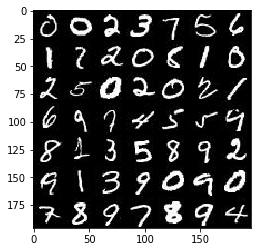

In [2]:
show_n_images = 50

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot
import helper

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

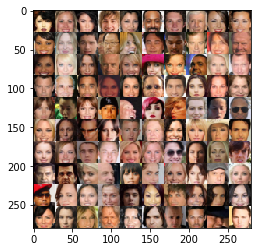

In [3]:
show_n_images = 100

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, (None,  image_width, image_height,image_channels), name='input_real')
    input_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 28x28x3
        alpha = 0.2
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        print ("relu1",relu1.get_shape())
        # 14x14x64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        #print ("relu2", relu2.get_shape())
        # 7x7x128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=1, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        print ("relu3", relu3.get_shape())
        # 4x4x256
        
        x4 = tf.layers.conv2d(relu3, 512, 5, strides=1, padding='same')
        bn4 = tf.layers.batch_normalization(x4, training=True)
        relu4 = tf.maximum(alpha * bn4, bn4)
        print ("relu4", relu4.get_shape())
        # 4x4x256
        
        # Flatten it
        flat = tf.reshape(relu4, (-1, 7*7*512))
        print ("flat", flat.get_shape())
        logits = tf.layers.dense(flat, 1)
        print ("logits", logits.get_shape())
        out = tf.sigmoid(logits)
        
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

relu1 (?, 14, 14, 64)
relu3 (?, 7, 7, 256)
relu4 (?, 7, 7, 512)
flat (?, 25088)
logits (?, 1)
relu1 (?, 14, 14, 64)
relu3 (?, 7, 7, 256)
relu4 (?, 7, 7, 512)
flat (?, 25088)
logits (?, 1)
Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=(not is_train)):
        # First fully connected layer
        alpha = 0.2
        x1 = tf.layers.dense(z, 7*7*512)
        #x1 = tf.layers.dense(z, 7*7*256)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        #x1 = tf.reshape(x1, (-1, 7, 7, 256))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        #print ("x1", x1.get_shape())
        # 7x7x256 now
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same')
        #x2 = tf.layers.conv2d_transpose(x1, 128, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        print ("x2", x2.get_shape())
        # 14x14x128 now
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        #x3 = tf.layers.conv2d_transpose(x2, 64, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        print ("x3", x3.get_shape())
        # 28x28x64 now
        
        x4 = tf.layers.conv2d_transpose(x3, 64, 5, strides=1, padding='same')
        x4 = tf.layers.batch_normalization(x4, training=is_train)
        x4 = tf.maximum(alpha * x4, x4)
        print ("x4", x4.get_shape())
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x4, out_channel_dim, 5, strides=1, padding='same')
        print ("logits", logits.get_shape())
        # 32x32x3 now
        
        out = tf.tanh(logits)
        
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

x2 (?, 14, 14, 256)
x3 (?, 28, 28, 128)
x4 (?, 28, 28, 64)
logits (?, 28, 28, 5)
x2 (?, 14, 14, 256)
x3 (?, 28, 28, 128)
x4 (?, 28, 28, 64)
logits (?, 28, 28, 5)
Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

x2 (?, 14, 14, 256)
x3 (?, 28, 28, 128)
x4 (?, 28, 28, 64)
logits (?, 28, 28, 4)
relu1 (?, 14, 14, 64)
relu3 (?, 7, 7, 256)
relu4 (?, 7, 7, 512)
flat (?, 25088)
logits (?, 1)
relu1 (?, 14, 14, 64)
relu3 (?, 7, 7, 256)
relu4 (?, 7, 7, 512)
flat (?, 25088)
logits (?, 1)
Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    #input_real, input_z, learn_rate = model_inputs(image_width, image_height, image_channels, z_dim)
    input_real, input_z, learning_r = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_r, beta1)
    
    step = 0
    losses = []
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                step += 1
                batch_images *= 2

                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                # Run optimizers
                sess.run(d_train_opt, feed_dict={input_real:batch_images,input_z:batch_z, learning_r:learning_rate})
                sess.run(g_train_opt, feed_dict={input_real:batch_images, input_z:batch_z, learning_r:learning_rate})

                if step % 10 == 0:
                    train_loss_d = d_loss.eval({input_z:batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z:batch_z})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))

                if step %100 == 0:
                    show_generator_output(sess, 25, input_z, data_shape[3], data_image_mode)
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

x2 (?, 14, 14, 256)
x3 (?, 28, 28, 128)
x4 (?, 28, 28, 64)
logits (?, 28, 28, 1)
relu1 (?, 14, 14, 64)
relu3 (?, 7, 7, 256)
relu4 (?, 7, 7, 512)
flat (?, 25088)
logits (?, 1)
relu1 (?, 14, 14, 64)
relu3 (?, 7, 7, 256)
relu4 (?, 7, 7, 512)
flat (?, 25088)
logits (?, 1)
Epoch 1/2... Discriminator Loss: 0.0239... Generator Loss: 48.6975
Epoch 1/2... Discriminator Loss: 0.7565... Generator Loss: 6.2152
Epoch 1/2... Discriminator Loss: 7.6155... Generator Loss: 9.8920
Epoch 1/2... Discriminator Loss: 1.6207... Generator Loss: 1.3777
Epoch 1/2... Discriminator Loss: 4.1467... Generator Loss: 0.4152
Epoch 1/2... Discriminator Loss: 2.5752... Generator Loss: 0.2326
Epoch 1/2... Discriminator Loss: 3.1625... Generator Loss: 0.1245
Epoch 1/2... Discriminator Loss: 2.4675... Generator Loss: 0.2804
Epoch 1/2... Discriminator Loss: 3.7477... Generator Loss: 0.0769
Epoch 1/2... Discriminator Loss: 2.1902... Generator Loss: 0.2578
x2 (?, 14, 14, 256)
x3 (?, 28, 28, 128)
x4 (?, 28, 28, 64)
logits (?, 

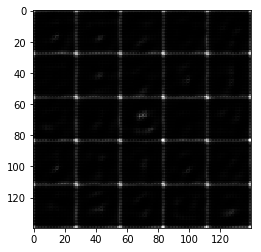

Epoch 1/2... Discriminator Loss: 2.0611... Generator Loss: 0.2673
Epoch 1/2... Discriminator Loss: 1.4231... Generator Loss: 1.5661
Epoch 1/2... Discriminator Loss: 2.6079... Generator Loss: 1.6417
Epoch 1/2... Discriminator Loss: 1.9487... Generator Loss: 1.4580
Epoch 1/2... Discriminator Loss: 1.9474... Generator Loss: 0.8118
Epoch 1/2... Discriminator Loss: 3.1003... Generator Loss: 3.3430
Epoch 1/2... Discriminator Loss: 3.4941... Generator Loss: 3.4400
Epoch 1/2... Discriminator Loss: 1.6567... Generator Loss: 1.4648
Epoch 1/2... Discriminator Loss: 0.6447... Generator Loss: 1.9086
Epoch 1/2... Discriminator Loss: 1.9356... Generator Loss: 0.5315
x2 (?, 14, 14, 256)
x3 (?, 28, 28, 128)
x4 (?, 28, 28, 64)
logits (?, 28, 28, 1)


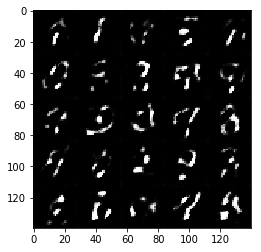

Epoch 1/2... Discriminator Loss: 0.1636... Generator Loss: 2.4080
Epoch 1/2... Discriminator Loss: 5.6146... Generator Loss: 5.3545
Epoch 1/2... Discriminator Loss: 1.9108... Generator Loss: 0.8033
Epoch 1/2... Discriminator Loss: 1.3522... Generator Loss: 0.6416
Epoch 1/2... Discriminator Loss: 1.7977... Generator Loss: 0.2651
Epoch 1/2... Discriminator Loss: 1.3467... Generator Loss: 2.5705
Epoch 1/2... Discriminator Loss: 1.1407... Generator Loss: 1.6804
Epoch 1/2... Discriminator Loss: 0.2631... Generator Loss: 2.0541
Epoch 1/2... Discriminator Loss: 1.6378... Generator Loss: 1.7140
Epoch 1/2... Discriminator Loss: 1.0470... Generator Loss: 1.9593
x2 (?, 14, 14, 256)
x3 (?, 28, 28, 128)
x4 (?, 28, 28, 64)
logits (?, 28, 28, 1)


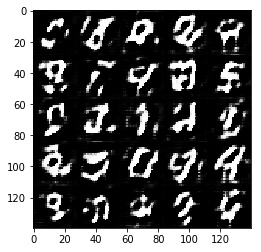

Epoch 1/2... Discriminator Loss: 0.7460... Generator Loss: 2.3869
Epoch 1/2... Discriminator Loss: 0.9592... Generator Loss: 1.2402
Epoch 1/2... Discriminator Loss: 1.2571... Generator Loss: 1.1462
Epoch 1/2... Discriminator Loss: 2.2331... Generator Loss: 3.2153
Epoch 1/2... Discriminator Loss: 2.3790... Generator Loss: 0.2195
Epoch 1/2... Discriminator Loss: 0.2549... Generator Loss: 2.1565
Epoch 1/2... Discriminator Loss: 0.9238... Generator Loss: 1.0505
Epoch 1/2... Discriminator Loss: 0.6303... Generator Loss: 1.0768
Epoch 1/2... Discriminator Loss: 0.6934... Generator Loss: 1.7620
Epoch 1/2... Discriminator Loss: 2.0626... Generator Loss: 0.8174
x2 (?, 14, 14, 256)
x3 (?, 28, 28, 128)
x4 (?, 28, 28, 64)
logits (?, 28, 28, 1)


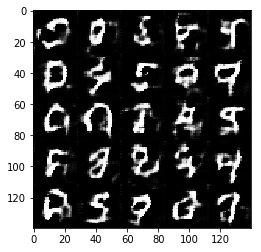

Epoch 1/2... Discriminator Loss: 1.9385... Generator Loss: 1.8833
Epoch 1/2... Discriminator Loss: 1.1939... Generator Loss: 1.2778
Epoch 1/2... Discriminator Loss: 1.5826... Generator Loss: 0.8322
Epoch 1/2... Discriminator Loss: 1.5578... Generator Loss: 0.6635
Epoch 1/2... Discriminator Loss: 1.5542... Generator Loss: 0.9355
Epoch 1/2... Discriminator Loss: 1.4135... Generator Loss: 0.7970
Epoch 2/2... Discriminator Loss: 1.2373... Generator Loss: 1.5202
Epoch 2/2... Discriminator Loss: 1.1610... Generator Loss: 1.1984
Epoch 2/2... Discriminator Loss: 2.0463... Generator Loss: 0.2103
Epoch 2/2... Discriminator Loss: 1.4856... Generator Loss: 0.8465
x2 (?, 14, 14, 256)
x3 (?, 28, 28, 128)
x4 (?, 28, 28, 64)
logits (?, 28, 28, 1)


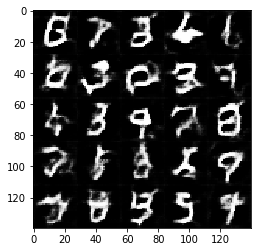

Epoch 2/2... Discriminator Loss: 1.3491... Generator Loss: 1.1648
Epoch 2/2... Discriminator Loss: 1.8769... Generator Loss: 0.4887
Epoch 2/2... Discriminator Loss: 1.6899... Generator Loss: 0.5366
Epoch 2/2... Discriminator Loss: 1.4205... Generator Loss: 0.7143
Epoch 2/2... Discriminator Loss: 1.8316... Generator Loss: 0.4315
Epoch 2/2... Discriminator Loss: 1.7783... Generator Loss: 2.1332
Epoch 2/2... Discriminator Loss: 1.0907... Generator Loss: 0.7870
Epoch 2/2... Discriminator Loss: 1.1148... Generator Loss: 1.1275
Epoch 2/2... Discriminator Loss: 1.3761... Generator Loss: 0.5801
Epoch 2/2... Discriminator Loss: 1.1788... Generator Loss: 2.0027
x2 (?, 14, 14, 256)
x3 (?, 28, 28, 128)
x4 (?, 28, 28, 64)
logits (?, 28, 28, 1)


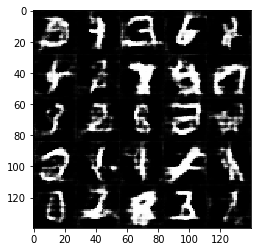

Epoch 2/2... Discriminator Loss: 1.1245... Generator Loss: 1.0928
Epoch 2/2... Discriminator Loss: 1.3300... Generator Loss: 1.1516
Epoch 2/2... Discriminator Loss: 1.9642... Generator Loss: 1.9656
Epoch 2/2... Discriminator Loss: 1.4013... Generator Loss: 0.5844
Epoch 2/2... Discriminator Loss: 1.3246... Generator Loss: 0.5451
Epoch 2/2... Discriminator Loss: 1.1906... Generator Loss: 0.9494
Epoch 2/2... Discriminator Loss: 1.4514... Generator Loss: 0.4805
Epoch 2/2... Discriminator Loss: 1.2496... Generator Loss: 1.3987
Epoch 2/2... Discriminator Loss: 1.3032... Generator Loss: 1.4787
Epoch 2/2... Discriminator Loss: 1.2758... Generator Loss: 0.7857
x2 (?, 14, 14, 256)
x3 (?, 28, 28, 128)
x4 (?, 28, 28, 64)
logits (?, 28, 28, 1)


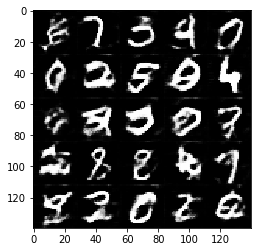

Epoch 2/2... Discriminator Loss: 0.9303... Generator Loss: 1.0948
Epoch 2/2... Discriminator Loss: 0.7728... Generator Loss: 1.1204
Epoch 2/2... Discriminator Loss: 1.0056... Generator Loss: 1.5179
Epoch 2/2... Discriminator Loss: 1.6176... Generator Loss: 3.1391
Epoch 2/2... Discriminator Loss: 1.4321... Generator Loss: 1.0889
Epoch 2/2... Discriminator Loss: 1.0640... Generator Loss: 1.2029
Epoch 2/2... Discriminator Loss: 1.4523... Generator Loss: 1.6665
Epoch 2/2... Discriminator Loss: 1.4440... Generator Loss: 0.4753
Epoch 2/2... Discriminator Loss: 1.0473... Generator Loss: 0.7590
Epoch 2/2... Discriminator Loss: 1.2954... Generator Loss: 1.9010
x2 (?, 14, 14, 256)
x3 (?, 28, 28, 128)
x4 (?, 28, 28, 64)
logits (?, 28, 28, 1)


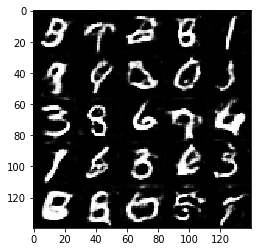

Epoch 2/2... Discriminator Loss: 1.2776... Generator Loss: 1.0646
Epoch 2/2... Discriminator Loss: 1.2495... Generator Loss: 0.8638
Epoch 2/2... Discriminator Loss: 1.3632... Generator Loss: 0.9512
Epoch 2/2... Discriminator Loss: 1.1968... Generator Loss: 0.6927
Epoch 2/2... Discriminator Loss: 1.3898... Generator Loss: 0.4588
Epoch 2/2... Discriminator Loss: 1.1785... Generator Loss: 0.8310
Epoch 2/2... Discriminator Loss: 1.6649... Generator Loss: 0.4468
Epoch 2/2... Discriminator Loss: 1.2503... Generator Loss: 1.1157
Epoch 2/2... Discriminator Loss: 1.2962... Generator Loss: 0.6603
Epoch 2/2... Discriminator Loss: 1.1859... Generator Loss: 0.7870
x2 (?, 14, 14, 256)
x3 (?, 28, 28, 128)
x4 (?, 28, 28, 64)
logits (?, 28, 28, 1)


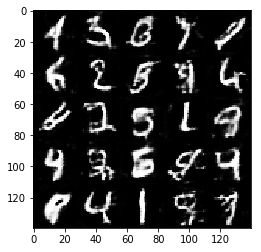

Epoch 2/2... Discriminator Loss: 1.5113... Generator Loss: 2.0640
Epoch 2/2... Discriminator Loss: 1.3844... Generator Loss: 0.5558
Epoch 2/2... Discriminator Loss: 1.1029... Generator Loss: 0.8517


In [105]:
batch_size = 128
z_dim = 100
learning_rate = 0.001
beta1 = 0.3


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

x2 (?, 14, 14, 256)
x3 (?, 28, 28, 128)
x4 (?, 28, 28, 64)
logits (?, 28, 28, 3)
relu1 (?, 14, 14, 64)
relu3 (?, 7, 7, 256)
relu4 (?, 7, 7, 512)
flat (?, 25088)
logits (?, 1)
relu1 (?, 14, 14, 64)
relu3 (?, 7, 7, 256)
relu4 (?, 7, 7, 512)
flat (?, 25088)
logits (?, 1)
Epoch 1/1... Discriminator Loss: 0.6588... Generator Loss: 8.6430
Epoch 1/1... Discriminator Loss: 4.4121... Generator Loss: 0.5033
Epoch 1/1... Discriminator Loss: 2.5414... Generator Loss: 1.5306
Epoch 1/1... Discriminator Loss: 2.0667... Generator Loss: 1.4942
Epoch 1/1... Discriminator Loss: 2.2920... Generator Loss: 3.2862
Epoch 1/1... Discriminator Loss: 2.1807... Generator Loss: 0.1881
Epoch 1/1... Discriminator Loss: 1.1428... Generator Loss: 1.7437
Epoch 1/1... Discriminator Loss: 1.9715... Generator Loss: 1.1319
Epoch 1/1... Discriminator Loss: 2.1940... Generator Loss: 0.7490
Epoch 1/1... Discriminator Loss: 2.0656... Generator Loss: 0.1866
x2 (?, 14, 14, 256)
x3 (?, 28, 28, 128)
x4 (?, 28, 28, 64)
logits (?, 2

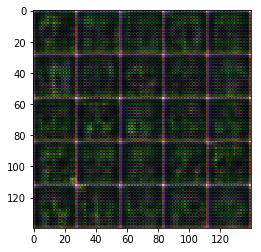

Epoch 1/1... Discriminator Loss: 2.3118... Generator Loss: 0.6893
Epoch 1/1... Discriminator Loss: 1.4682... Generator Loss: 0.4083
Epoch 1/1... Discriminator Loss: 2.0885... Generator Loss: 0.4356
Epoch 1/1... Discriminator Loss: 0.2920... Generator Loss: 2.0261
Epoch 1/1... Discriminator Loss: 0.1534... Generator Loss: 2.5953
Epoch 1/1... Discriminator Loss: 0.0649... Generator Loss: 4.9459
Epoch 1/1... Discriminator Loss: 1.0267... Generator Loss: 1.9279
Epoch 1/1... Discriminator Loss: 0.9076... Generator Loss: 1.3151
Epoch 1/1... Discriminator Loss: 1.0790... Generator Loss: 1.0370
Epoch 1/1... Discriminator Loss: 1.2429... Generator Loss: 0.5512
x2 (?, 14, 14, 256)
x3 (?, 28, 28, 128)
x4 (?, 28, 28, 64)
logits (?, 28, 28, 3)


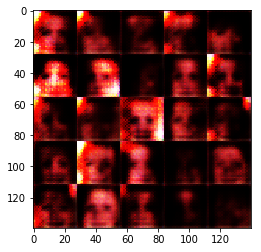

Epoch 1/1... Discriminator Loss: 1.4861... Generator Loss: 0.5603
Epoch 1/1... Discriminator Loss: 1.6252... Generator Loss: 4.3821
Epoch 1/1... Discriminator Loss: 0.4690... Generator Loss: 2.7200
Epoch 1/1... Discriminator Loss: 1.3685... Generator Loss: 2.0807
Epoch 1/1... Discriminator Loss: 0.2819... Generator Loss: 2.2619
Epoch 1/1... Discriminator Loss: 0.7304... Generator Loss: 1.4344
Epoch 1/1... Discriminator Loss: 0.2184... Generator Loss: 2.0506
Epoch 1/1... Discriminator Loss: 3.1280... Generator Loss: 0.7775
Epoch 1/1... Discriminator Loss: 0.9515... Generator Loss: 0.7526
Epoch 1/1... Discriminator Loss: 1.1486... Generator Loss: 1.4272
x2 (?, 14, 14, 256)
x3 (?, 28, 28, 128)
x4 (?, 28, 28, 64)
logits (?, 28, 28, 3)


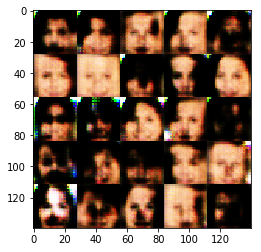

Epoch 1/1... Discriminator Loss: 1.6376... Generator Loss: 0.5585
Epoch 1/1... Discriminator Loss: 0.7430... Generator Loss: 1.4345
Epoch 1/1... Discriminator Loss: 0.6671... Generator Loss: 1.7791
Epoch 1/1... Discriminator Loss: 1.4799... Generator Loss: 0.5233
Epoch 1/1... Discriminator Loss: 1.7075... Generator Loss: 1.0943
Epoch 1/1... Discriminator Loss: 0.7815... Generator Loss: 1.1009
Epoch 1/1... Discriminator Loss: 0.9221... Generator Loss: 0.9370
Epoch 1/1... Discriminator Loss: 1.5743... Generator Loss: 0.6350
Epoch 1/1... Discriminator Loss: 1.3236... Generator Loss: 1.4383
Epoch 1/1... Discriminator Loss: 0.2130... Generator Loss: 2.3798
x2 (?, 14, 14, 256)
x3 (?, 28, 28, 128)
x4 (?, 28, 28, 64)
logits (?, 28, 28, 3)


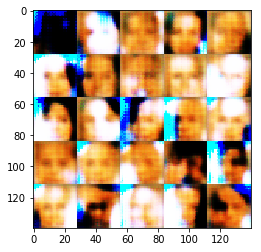

Epoch 1/1... Discriminator Loss: 0.6481... Generator Loss: 2.0660
Epoch 1/1... Discriminator Loss: 0.3837... Generator Loss: 1.5584
Epoch 1/1... Discriminator Loss: 0.9293... Generator Loss: 0.8889
Epoch 1/1... Discriminator Loss: 0.8318... Generator Loss: 1.2523
Epoch 1/1... Discriminator Loss: 0.1622... Generator Loss: 2.9283
Epoch 1/1... Discriminator Loss: 1.1866... Generator Loss: 0.9680
Epoch 1/1... Discriminator Loss: 0.9232... Generator Loss: 1.2125
Epoch 1/1... Discriminator Loss: 7.1805... Generator Loss: 5.3923
Epoch 1/1... Discriminator Loss: 0.2475... Generator Loss: 3.2311
Epoch 1/1... Discriminator Loss: 0.1462... Generator Loss: 2.7105
x2 (?, 14, 14, 256)
x3 (?, 28, 28, 128)
x4 (?, 28, 28, 64)
logits (?, 28, 28, 3)


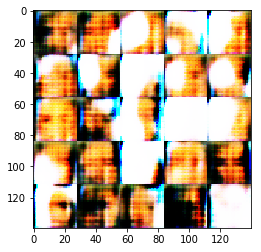

Epoch 1/1... Discriminator Loss: 0.0538... Generator Loss: 4.0356
Epoch 1/1... Discriminator Loss: 0.2105... Generator Loss: 2.3664
Epoch 1/1... Discriminator Loss: 0.0309... Generator Loss: 4.2466
Epoch 1/1... Discriminator Loss: 0.1566... Generator Loss: 2.4556
Epoch 1/1... Discriminator Loss: 1.2076... Generator Loss: 1.2546
Epoch 1/1... Discriminator Loss: 0.3078... Generator Loss: 1.9636
Epoch 1/1... Discriminator Loss: 1.6085... Generator Loss: 2.7528
Epoch 1/1... Discriminator Loss: 0.4415... Generator Loss: 1.7190
Epoch 1/1... Discriminator Loss: 1.3722... Generator Loss: 0.6496
Epoch 1/1... Discriminator Loss: 1.2553... Generator Loss: 1.8334
x2 (?, 14, 14, 256)
x3 (?, 28, 28, 128)
x4 (?, 28, 28, 64)
logits (?, 28, 28, 3)


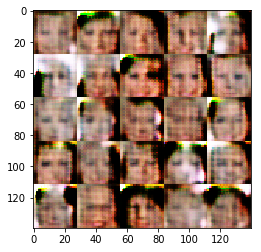

Epoch 1/1... Discriminator Loss: 1.2475... Generator Loss: 2.0169
Epoch 1/1... Discriminator Loss: 0.8770... Generator Loss: 3.3922
Epoch 1/1... Discriminator Loss: 1.4154... Generator Loss: 0.4439
Epoch 1/1... Discriminator Loss: 0.2642... Generator Loss: 1.8842
Epoch 1/1... Discriminator Loss: 0.5573... Generator Loss: 1.4440
Epoch 1/1... Discriminator Loss: 1.8350... Generator Loss: 3.1600
Epoch 1/1... Discriminator Loss: 0.2226... Generator Loss: 2.0495
Epoch 1/1... Discriminator Loss: 1.9390... Generator Loss: 0.3031
Epoch 1/1... Discriminator Loss: 1.5657... Generator Loss: 0.6001
Epoch 1/1... Discriminator Loss: 1.1550... Generator Loss: 1.3412
x2 (?, 14, 14, 256)
x3 (?, 28, 28, 128)
x4 (?, 28, 28, 64)
logits (?, 28, 28, 3)


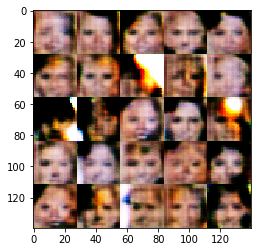

Epoch 1/1... Discriminator Loss: 1.5372... Generator Loss: 0.8122
Epoch 1/1... Discriminator Loss: 0.9522... Generator Loss: 2.9174
Epoch 1/1... Discriminator Loss: 0.9329... Generator Loss: 1.0925
Epoch 1/1... Discriminator Loss: 0.9030... Generator Loss: 1.8180
Epoch 1/1... Discriminator Loss: 0.6631... Generator Loss: 1.1659
Epoch 1/1... Discriminator Loss: 0.3383... Generator Loss: 1.7414
Epoch 1/1... Discriminator Loss: 0.5966... Generator Loss: 1.5916
Epoch 1/1... Discriminator Loss: 0.7456... Generator Loss: 2.9157
Epoch 1/1... Discriminator Loss: 0.6291... Generator Loss: 1.3027
Epoch 1/1... Discriminator Loss: 1.1621... Generator Loss: 0.6733
x2 (?, 14, 14, 256)
x3 (?, 28, 28, 128)
x4 (?, 28, 28, 64)
logits (?, 28, 28, 3)


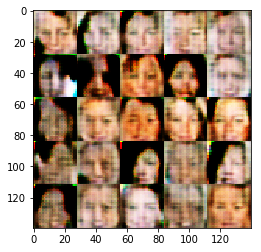

Epoch 1/1... Discriminator Loss: 2.1594... Generator Loss: 4.5863
Epoch 1/1... Discriminator Loss: 2.0716... Generator Loss: 2.6555
Epoch 1/1... Discriminator Loss: 0.9960... Generator Loss: 0.7574
Epoch 1/1... Discriminator Loss: 0.9420... Generator Loss: 1.1761
Epoch 1/1... Discriminator Loss: 0.9066... Generator Loss: 1.0033
Epoch 1/1... Discriminator Loss: 1.0729... Generator Loss: 1.2397
Epoch 1/1... Discriminator Loss: 1.1433... Generator Loss: 0.6917
Epoch 1/1... Discriminator Loss: 1.4705... Generator Loss: 0.3898
Epoch 1/1... Discriminator Loss: 2.4530... Generator Loss: 3.6284
Epoch 1/1... Discriminator Loss: 1.1847... Generator Loss: 1.2370
x2 (?, 14, 14, 256)
x3 (?, 28, 28, 128)
x4 (?, 28, 28, 64)
logits (?, 28, 28, 3)


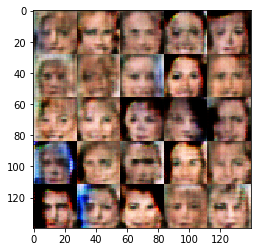

Epoch 1/1... Discriminator Loss: 1.7137... Generator Loss: 0.3977
Epoch 1/1... Discriminator Loss: 1.1420... Generator Loss: 1.2850
Epoch 1/1... Discriminator Loss: 0.8028... Generator Loss: 0.7493
Epoch 1/1... Discriminator Loss: 0.9718... Generator Loss: 0.7212
Epoch 1/1... Discriminator Loss: 1.9304... Generator Loss: 2.5485
Epoch 1/1... Discriminator Loss: 1.2881... Generator Loss: 0.7448
Epoch 1/1... Discriminator Loss: 1.5673... Generator Loss: 0.8951
Epoch 1/1... Discriminator Loss: 1.0479... Generator Loss: 0.9187
Epoch 1/1... Discriminator Loss: 0.9091... Generator Loss: 1.2899
Epoch 1/1... Discriminator Loss: 1.2361... Generator Loss: 1.0068
x2 (?, 14, 14, 256)
x3 (?, 28, 28, 128)
x4 (?, 28, 28, 64)
logits (?, 28, 28, 3)


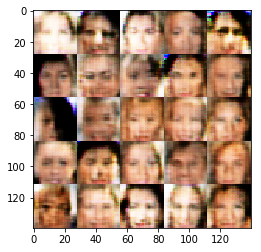

Epoch 1/1... Discriminator Loss: 0.7901... Generator Loss: 2.3850
Epoch 1/1... Discriminator Loss: 0.8263... Generator Loss: 0.7663
Epoch 1/1... Discriminator Loss: 1.4893... Generator Loss: 0.6361
Epoch 1/1... Discriminator Loss: 0.2150... Generator Loss: 2.2234
Epoch 1/1... Discriminator Loss: 0.4987... Generator Loss: 1.0901
Epoch 1/1... Discriminator Loss: 1.2264... Generator Loss: 0.5962
Epoch 1/1... Discriminator Loss: 0.4745... Generator Loss: 2.4162
Epoch 1/1... Discriminator Loss: 1.0659... Generator Loss: 0.7306
Epoch 1/1... Discriminator Loss: 0.2990... Generator Loss: 2.3379
Epoch 1/1... Discriminator Loss: 0.9849... Generator Loss: 0.7129
x2 (?, 14, 14, 256)
x3 (?, 28, 28, 128)
x4 (?, 28, 28, 64)
logits (?, 28, 28, 3)


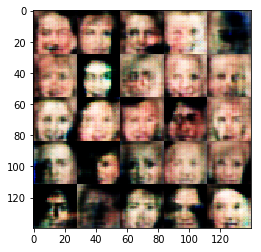

Epoch 1/1... Discriminator Loss: 0.9506... Generator Loss: 1.3372
Epoch 1/1... Discriminator Loss: 0.6321... Generator Loss: 1.4840
Epoch 1/1... Discriminator Loss: 0.8141... Generator Loss: 0.8941
Epoch 1/1... Discriminator Loss: 0.9271... Generator Loss: 1.3152
Epoch 1/1... Discriminator Loss: 1.0977... Generator Loss: 1.0089
Epoch 1/1... Discriminator Loss: 1.3657... Generator Loss: 1.2268
Epoch 1/1... Discriminator Loss: 0.8683... Generator Loss: 1.2234
Epoch 1/1... Discriminator Loss: 1.2827... Generator Loss: 1.3258
Epoch 1/1... Discriminator Loss: 0.8182... Generator Loss: 0.9382
Epoch 1/1... Discriminator Loss: 1.2497... Generator Loss: 0.5527
x2 (?, 14, 14, 256)
x3 (?, 28, 28, 128)
x4 (?, 28, 28, 64)
logits (?, 28, 28, 3)


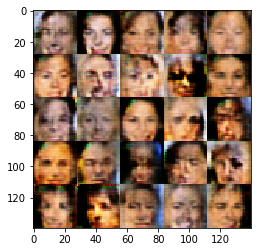

Epoch 1/1... Discriminator Loss: 0.9106... Generator Loss: 2.7630
Epoch 1/1... Discriminator Loss: 1.1035... Generator Loss: 1.0645
Epoch 1/1... Discriminator Loss: 1.9054... Generator Loss: 3.0476
Epoch 1/1... Discriminator Loss: 1.5749... Generator Loss: 0.8431
Epoch 1/1... Discriminator Loss: 1.4558... Generator Loss: 1.7472
Epoch 1/1... Discriminator Loss: 1.4626... Generator Loss: 1.0597
Epoch 1/1... Discriminator Loss: 1.2553... Generator Loss: 1.4010
Epoch 1/1... Discriminator Loss: 0.6015... Generator Loss: 1.1232
Epoch 1/1... Discriminator Loss: 1.5159... Generator Loss: 0.4872
Epoch 1/1... Discriminator Loss: 0.9290... Generator Loss: 1.0360
x2 (?, 14, 14, 256)
x3 (?, 28, 28, 128)
x4 (?, 28, 28, 64)
logits (?, 28, 28, 3)


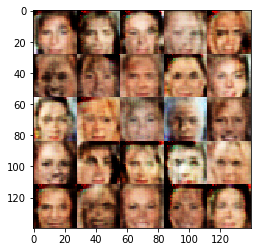

Epoch 1/1... Discriminator Loss: 0.8923... Generator Loss: 1.3103
Epoch 1/1... Discriminator Loss: 0.9815... Generator Loss: 0.9419
Epoch 1/1... Discriminator Loss: 1.4859... Generator Loss: 1.5901
Epoch 1/1... Discriminator Loss: 0.7551... Generator Loss: 0.9037
Epoch 1/1... Discriminator Loss: 1.4558... Generator Loss: 1.1740
Epoch 1/1... Discriminator Loss: 1.2952... Generator Loss: 1.0289
Epoch 1/1... Discriminator Loss: 1.4354... Generator Loss: 1.2507
Epoch 1/1... Discriminator Loss: 1.4997... Generator Loss: 0.5709
Epoch 1/1... Discriminator Loss: 0.0929... Generator Loss: 6.8634
Epoch 1/1... Discriminator Loss: 0.4037... Generator Loss: 4.4115
x2 (?, 14, 14, 256)
x3 (?, 28, 28, 128)
x4 (?, 28, 28, 64)
logits (?, 28, 28, 3)


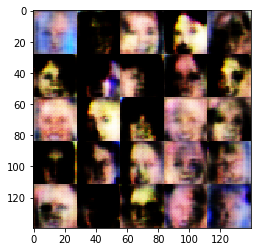

Epoch 1/1... Discriminator Loss: 6.4836... Generator Loss: 8.3899
Epoch 1/1... Discriminator Loss: 0.6945... Generator Loss: 1.7110
Epoch 1/1... Discriminator Loss: 0.5522... Generator Loss: 1.5777
Epoch 1/1... Discriminator Loss: 2.5634... Generator Loss: 0.2880
Epoch 1/1... Discriminator Loss: 0.8424... Generator Loss: 2.3044
Epoch 1/1... Discriminator Loss: 1.0987... Generator Loss: 0.9155
Epoch 1/1... Discriminator Loss: 0.8996... Generator Loss: 1.9359
Epoch 1/1... Discriminator Loss: 0.7487... Generator Loss: 0.9759
Epoch 1/1... Discriminator Loss: 0.4911... Generator Loss: 2.5579
Epoch 1/1... Discriminator Loss: 0.6750... Generator Loss: 0.8921
x2 (?, 14, 14, 256)
x3 (?, 28, 28, 128)
x4 (?, 28, 28, 64)
logits (?, 28, 28, 3)


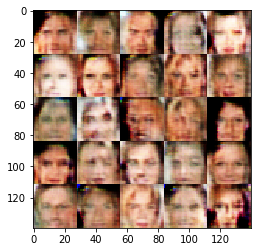

Epoch 1/1... Discriminator Loss: 1.1857... Generator Loss: 1.2444
Epoch 1/1... Discriminator Loss: 1.7825... Generator Loss: 2.5398
Epoch 1/1... Discriminator Loss: 1.3559... Generator Loss: 0.6370
Epoch 1/1... Discriminator Loss: 0.4871... Generator Loss: 1.3398
Epoch 1/1... Discriminator Loss: 0.8427... Generator Loss: 1.0492
Epoch 1/1... Discriminator Loss: 1.4166... Generator Loss: 3.1038
Epoch 1/1... Discriminator Loss: 1.0610... Generator Loss: 0.7978
Epoch 1/1... Discriminator Loss: 0.8199... Generator Loss: 1.0168


In [107]:
batch_size = 128
z_dim = 100
learning_rate = 0.001
beta1 = 0.3


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.